In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

#### 1. Data Collection

In [14]:
now=datetime.now()

start=datetime(now.year-10,now.month,now.day)
end=now
ticker='AAPL'
df=yf.download(ticker,start,end)
df

C:\Users\sanja\AppData\Local\Temp\ipykernel_11176\3089098067.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker,start,end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-04,25.675556,26.360894,25.364242,26.298184,496554400
2015-08-05,25.845776,26.302668,25.106684,25.297056,397250400
2015-08-06,25.902020,26.210244,25.674790,26.091004,211612000
2015-08-07,25.989756,26.153992,25.760276,25.778275,154681600
2015-08-10,26.934683,26.995427,26.216994,26.216994,219806400
...,...,...,...,...,...
2025-07-28,214.050003,214.850006,213.059998,214.029999,37858000
2025-07-29,211.270004,214.809998,210.820007,214.179993,51411700


### 2. Data Exploration & Visualization

In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
df.shape

(2514, 5)

In [17]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [18]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,104.931873,105.987117,103.771366,104.836025,1.084732e+08
std,69.238806,69.919766,68.481862,69.170986,6.367847e+07
min,20.647457,20.951437,20.448617,20.569754,2.323470e+07
25%,39.677950,40.109555,39.222648,39.686964,6.588608e+07
50%,99.451168,100.302951,96.024624,98.206922,9.345420e+07
75%,165.907463,167.620961,164.167289,165.839332,1.314267e+08
max,258.396667,259.474086,257.010028,257.568678,6.488252e+08


In [19]:
df=df.reset_index()

In [20]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-08-04,25.675556,26.360894,25.364242,26.298184,496554400
1,2015-08-05,25.845776,26.302668,25.106684,25.297056,397250400
2,2015-08-06,25.902020,26.210244,25.674790,26.091004,211612000
3,2015-08-07,25.989756,26.153992,25.760276,25.778275,154681600
4,2015-08-10,26.934683,26.995427,26.216994,26.216994,219806400


Text(0, 0.5, 'Closing Price')

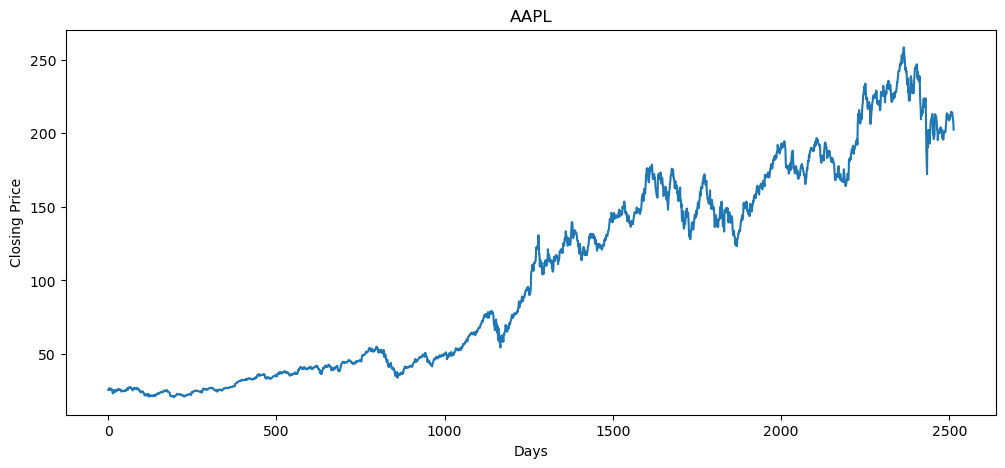

In [21]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Closing Price')

### 3. Feature Engineering

In [22]:
temp_df=[10,20,30,40,50,60,70,80,90,100]
print(sum(temp_df[2:7])/5)

50.0


In [23]:
df1=pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [24]:
df1['MA_5']=df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 Days Moving Avg

In [25]:
df['MA_100']=df.Close.rolling(100).mean()
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-04,25.675556,26.360894,25.364242,26.298184,496554400,NaN
1,2015-08-05,25.845776,26.302668,25.106684,25.297056,397250400,NaN
2,2015-08-06,25.902020,26.210244,25.674790,26.091004,211612000,NaN
3,2015-08-07,25.989756,26.153992,25.760276,25.778275,154681600,NaN
4,2015-08-10,26.934683,26.995427,26.216994,26.216994,219806400,NaN
...,...,...,...,...,...,...,...
98,2015-12-22,24.227934,24.338646,24.051696,24.266344,131157600,NaN
99,2015-12-23,24.539730,24.593956,24.221149,24.236965,130629600,25.707026
100,2015-12-24,24.408693,24.627859,24.390617,24.627859,54281600,25.694358


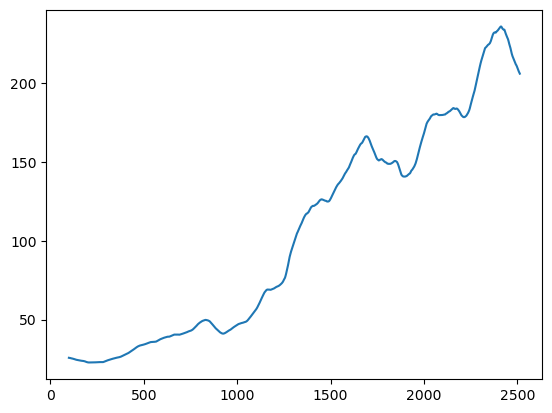

In [26]:
plt.plot(df['MA_100'])

Text(0, 0.5, 'Price')

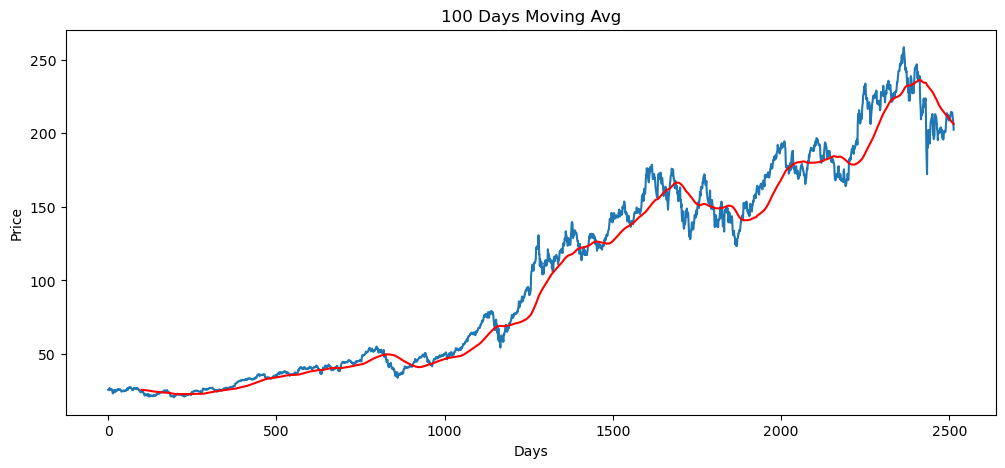

In [27]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.title('100 Days Moving Avg')
plt.xlabel('Days')
plt.ylabel('Price')

### 200 Days Moving Avg

In [28]:
df['MA_200']=df.Close.rolling(200).mean()
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-04,25.675556,26.360894,25.364242,26.298184,496554400,NaN,NaN
1,2015-08-05,25.845776,26.302668,25.106684,25.297056,397250400,NaN,NaN
2,2015-08-06,25.902020,26.210244,25.674790,26.091004,211612000,NaN,NaN
3,2015-08-07,25.989756,26.153992,25.760276,25.778275,154681600,NaN,NaN
4,2015-08-10,26.934683,26.995427,26.216994,26.216994,219806400,NaN,NaN
...,...,...,...,...,...,...,...,...
2509,2025-07-28,214.050003,214.850006,213.059998,214.029999,37858000,207.310985,221.630999
2510,2025-07-29,211.270004,214.809998,210.820007,214.179993,51411700,207.069373,221.562453
2511,2025-07-30,209.050003,212.389999,207.720001,211.899994,45512500,206.809655,221.464023


Text(0, 0.5, 'Price')

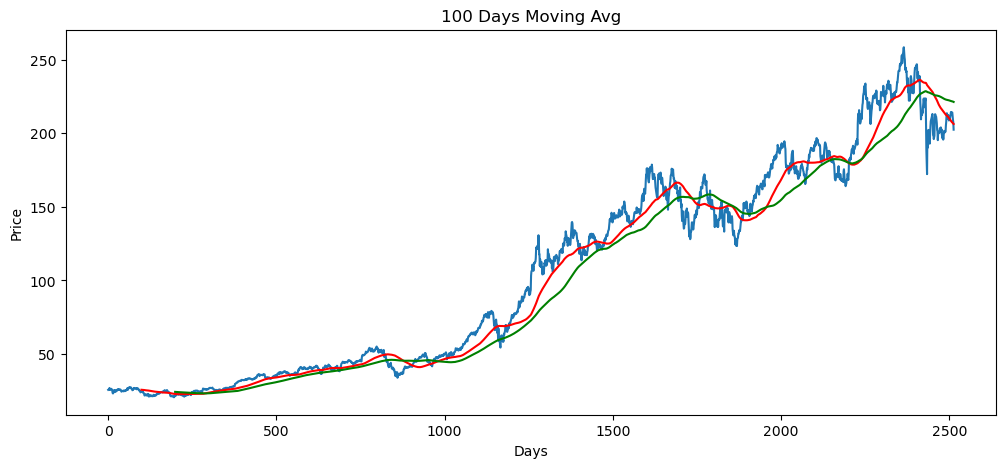

In [29]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.plot(df['MA_200'],'g')
plt.title('100 Days Moving Avg')
plt.xlabel('Days')
plt.ylabel('Price')

### Calculating percentage change 

In [30]:
df['percent_change']=df.Close.pct_change()
df[['Close','percent_change']]

Price,Close,percent_change
Ticker,AAPL,
0,25.675556,NaN
1,25.845776,0.006630
2,25.902020,0.002176
3,25.989756,0.003387
4,26.934683,0.036358
...,...,...
2509,214.050003,0.000795
2510,211.270004,-0.012988
2511,209.050003,-0.010508


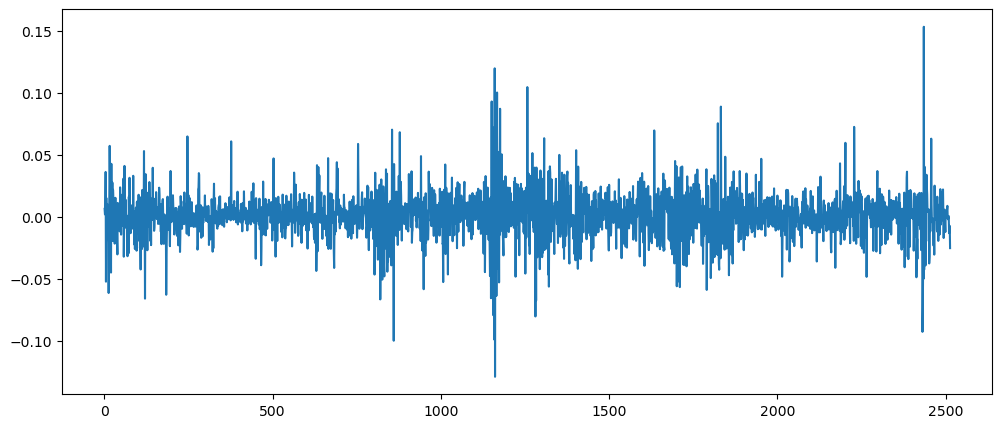

In [31]:
plt.figure(figsize=(12,5))
plt.plot(df['percent_change'])

### 4. Data Preprocessing

In [33]:
df.shape

(2514, 9)

#### Splitting the Dataset

In [37]:
data_training=pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing=pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

print(data_training)
print(data_testing)

Ticker        AAPL
0        25.675556
1        25.845776
2        25.902020
3        25.989756
4        26.934683
...            ...
1754    151.656937
1755    150.534927
1756    149.206253
1757    154.314270
1758    154.865448

[1759 rows x 1 columns]
Ticker        AAPL
1759    159.943954
1760    158.959778
1761    157.483444
1762    163.506805
1763    163.191879
...            ...
2509    214.050003
2510    211.270004
2511    209.050003
2512    207.570007
2513    202.380005

[755 rows x 1 columns]


In [38]:
# Conveting the data into zero and one

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [40]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.03182378],
       [0.03290113],
       [0.03325711],
       ...,
       [0.8136726 ],
       [0.84600219],
       [0.8494907 ]], shape=(1759, 1))

In [41]:
type(data_training_array)

numpy.ndarray

### 5. Sequence Creation

In [42]:
# x_train : previous days
# y_train : next days

In [46]:
x_train=[]
y_train=[]

for i in range (100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [47]:
x_train.ndim

3

## 6. Model Building

In [51]:
!pip install tensorflow

In [52]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Input

In [53]:
model=Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=128 , activation='tanh',return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

### 7.Model Training

In [56]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 153ms/step - loss: 0.0158
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 5.0130e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - loss: 4.7175e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 4.6510e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 4.5080e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - loss: 4.6472e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 4.4261e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - loss: 4.5617e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - loss: 4.5696e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - loss: 4.4731e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 3.9909e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 3.6079e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - loss: 3.4705e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - loss: 3.5601e-04
Epo

In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                       │ (None, 100, 128)         │        66,560 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                     │ (None, 64)               │        49,408 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense (Dense)                     │ (None, 25)               │         1,625 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                   │ (None, 1)                │            26 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [58]:
# Save the model

In [59]:
model.save('Stock_prediction_model.keras')

### 8. Prepare the Test Data

In [60]:
data_testing

Ticker,AAPL
1759,159.943954
1760,158.959778
1761,157.483444
1762,163.506805
1763,163.191879
...,...
2509,214.050003
2510,211.270004
2511,209.050003
2512,207.570007


In [61]:
past_100_data=data_training.tail(100)

In [62]:
past_100_data

Ticker,AAPL
1659,156.554672
1660,154.726700
1661,160.141739
1662,155.788055
1663,152.063416
...,...
1754,151.656937
1755,150.534927
1756,149.206253
1757,154.314270


In [63]:
final_df=pd.concat([past_100_data,data_testing],ignore_index=True)
final_df

Ticker,AAPL
0,156.554672
1,154.726700
2,160.141739
3,155.788055
4,152.063416
...,...
850,214.050003
851,211.270004
852,209.050003
853,207.570007


In [77]:
input_data=scaler.transform(final_df)


In [78]:
x_test=[]
y_test=[]

for i in range (100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)

In [79]:
x_test[0]

array([[0.24547746],
       [0.23193446],
       [0.27205316],
       [0.23979778],
       [0.21220283],
       [0.18227739],
       [0.21482398],
       [0.24758864],
       [0.25508795],
       [0.2795527 ],
       [0.2897463 ],
       [0.31479324],
       [0.3249137 ],
       [0.35301872],
       [0.35775139],
       [0.36415876],
       [0.38862317],
       [0.37995878],
       [0.35695055],
       [0.35476623],
       [0.38483706],
       [0.36022704],
       [0.33670919],
       [0.33896621],
       [0.32403972],
       [0.29244002],
       [0.30634704],
       [0.32629707],
       [0.28909084],
       [0.28748905],
       [0.30445381],
       [0.30321627],
       [0.29731852],
       [0.26360719],
       [0.27154354],
       [0.22727448],
       [0.22559989],
       [0.27707705],
       [0.23346355],
       [0.23572057],
       [0.24678769],
       [0.29440616],
       [0.22705607],
       [0.23245188],
       [0.19438885],
       [0.21225371],
       [0.15384655],
       [0.125

### 9. Make Prediction

In [80]:
y_predicted= model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step


In [69]:
y_predicted

array([[0.22570443],
       [0.24425846],
       [0.25907856],
       [0.26515424],
       [0.27987438],
       [0.2922693 ],
       [0.29973713],
       [0.30204406],
       [0.30184624],
       [0.31065807],
       [0.3179755 ],
       [0.33131918],
       [0.34513897],
       [0.35450852],
       [0.36311525],
       [0.36751372],
       [0.3625955 ],
       [0.34671056],
       [0.33155948],
       [0.32189006],
       [0.32294324],
       [0.31261328],
       [0.29730317],
       [0.2794944 ],
       [0.26254466],
       [0.25248873],
       [0.24322574],
       [0.23448126],
       [0.23148276],
       [0.22827046],
       [0.23210737],
       [0.2503537 ],
       [0.24803601],
       [0.2426018 ],
       [0.23090053],
       [0.21675654],
       [0.21323732],
       [0.21940438],
       [0.2210097 ],
       [0.21872874],
       [0.21086809],
       [0.20380697],
       [0.20082672],
       [0.19627127],
       [0.1779683 ],
       [0.15173589],
       [0.13715193],
       [0.137

In [81]:
y_predicted=scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test=scaler.inverse_transform(y_test.reshape(-1,1)).flatten()


In [82]:
y_predicted

array([153.8858  , 156.39014 , 158.39049 , 159.21056 , 161.19742 ,
       162.87042 , 163.87839 , 164.18977 , 164.16307 , 165.35245 ,
       166.34012 , 168.14119 , 170.00653 , 171.27118 , 172.43289 ,
       173.02657 , 172.36273 , 170.21864 , 168.17363 , 166.8685  ,
       167.01064 , 165.61635 , 163.54987 , 161.14612 , 158.85832 ,
       157.50102 , 156.25075 , 155.07047 , 154.66573 , 154.23216 ,
       154.75005 , 157.21284 , 156.90001 , 156.16653 , 154.58714 ,
       152.67805 , 152.20303 , 153.03546 , 153.25212 , 152.94426 ,
       151.88326 , 150.93018 , 150.52792 , 149.91304 , 147.44258 ,
       143.90186 , 141.9334  , 141.94267 , 142.83086 , 143.6257  ,
       142.82947 , 141.71342 , 140.3742  , 139.11916 , 139.33464 ,
       138.95058 , 139.42447 , 140.45222 , 141.48016 , 142.12975 ,
       143.45193 , 145.26155 , 147.56949 , 148.64467 , 147.73926 ,
       149.26494 , 150.5952  , 150.78535 , 148.98077 , 145.35258 ,
       141.97008 , 139.64926 , 138.45953 , 136.91882 , 138.533

In [83]:
y_test

array([159.94395447, 158.95977783, 157.48344421, 163.50680542,
       163.19187927, 162.9651947 , 162.49209595, 162.54138184,
       166.79907227, 166.05990601, 169.61782837, 170.6920929 ,
       170.53440857, 172.03248596, 171.63824463, 169.04618835,
       165.15316772, 164.81803894, 165.11375427, 167.57765198,
       161.26014709, 159.05244446, 156.61805725, 154.95243835,
       155.6817627 , 153.56277466, 152.30123901, 153.71060181,
       152.23225403, 155.10028076, 161.0728302 , 151.6211853 ,
       153.06999207, 150.17236328, 148.52645874, 152.25196838,
       154.63702393, 151.50289917, 150.5370636 , 148.26034546,
       148.59547424, 149.57118225, 147.67889404, 140.42503357,
       136.20677185, 140.39546204, 143.99281311, 144.28849792,
       143.33248901, 138.06950378, 138.39472961, 136.97549438,
       136.34475708, 140.9276886 , 136.38417053, 140.35606384,
       141.67672729, 141.78512573, 141.32191467, 145.14596558,
       147.29450989, 150.14283752, 147.19596863, 142.71

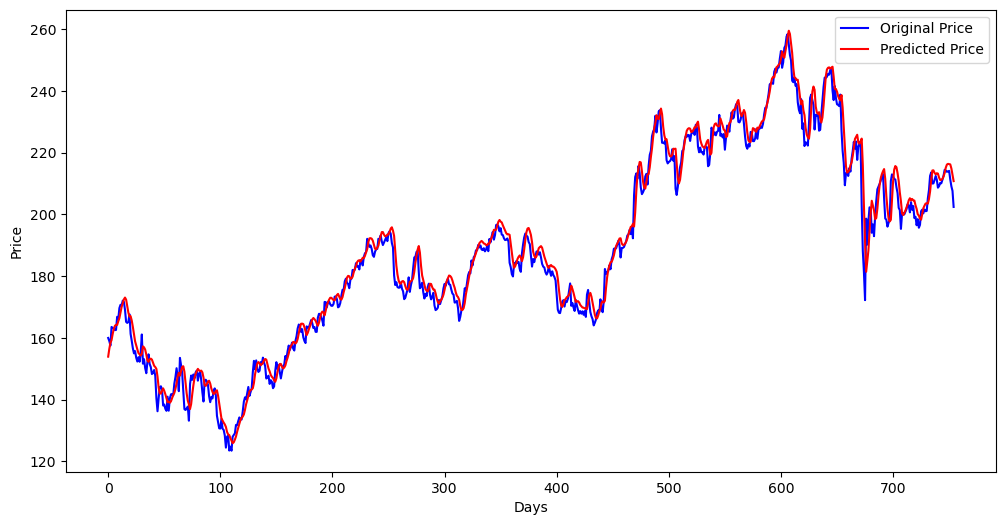

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

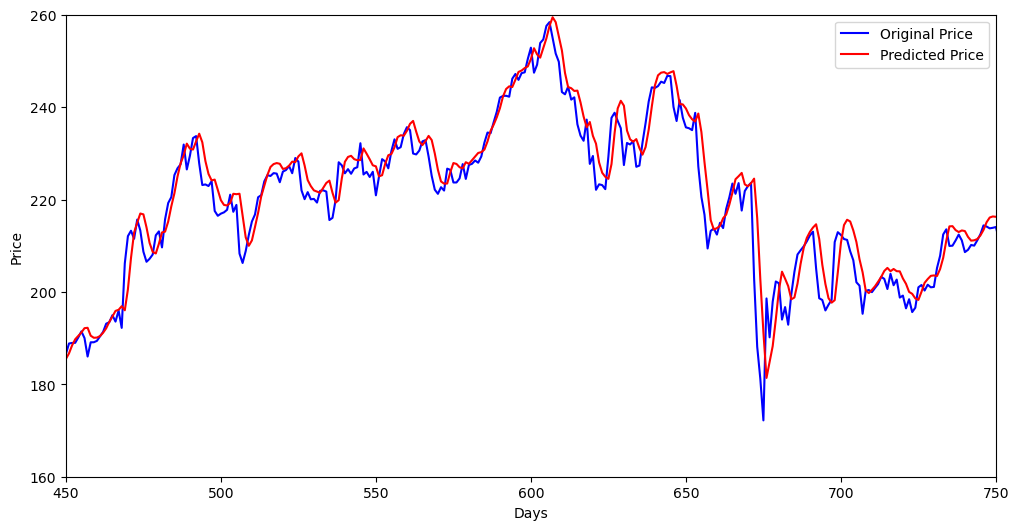

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xlim(450,750)
plt.ylim(160,260)
plt.legend()

### 10. Model Evaluation

In [88]:
# Mean Square Error (MSE)

In [95]:
from sklearn.metrics import mean_squared_error,r2_score

In [90]:
mse=mean_squared_error(y_test,y_predicted)
print(f"Mean Squared Error (MSE) :",mse)

Mean Squared Error (MSE) : 18.718701708894717


In [91]:
# Root Mean Squared Error

In [93]:
rmse=np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) :",rmse)

Root Mean Squared Error (RMSE) : 4.326511494136438


In [94]:
#R_Squared

In [96]:
r2=r2_score(y_test,y_predicted)
print(f"R-Squared :{r2}")

R-Squared :0.9806464892751368
